# **Fintech churn**

In [ ]:
# Importar e instalar dependencias

# Librerías para rocesamiento de datos y algebra lineal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Descarga de archivos de drive
!pip install gdown

# Carga de datos

###Descarga del archivo

In [ ]:
import pandas as pd

# Descarga el archivo del dataset de drive usando gdown
url = 'https://drive.google.com/file/d/1D_KAfe-xOVEdUml39xrWtPXZYXMNKD0H/view?usp=drive_link'
file_id = url.split('/')[-2]
!gdown --id $file_id

# Carga el dataset usando pandas
sd = pd.read_csv('/content/Fintech_user.csv')

# Verificamos las primeras filas
sd.head()


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1D_KAfe-xOVEdUml39xrWtPXZYXMNKD0H
To: /content/Fintech_user.csv
100% 2.50M/2.50M [00:00<00:00, 10.1MB/s]


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [ ]:
# Dimensiones de los datos
print("Dimension: ",sd.shape)

# Númerode filas y columnas
print("Numero de filas =",sd.shape[0])
print("Numero de columnas =",sd.shape[1])

# Imprime el nombre de las columnas
nombres_columnas = sd.columns
print(nombres_columnas)

Dimension:  (27000, 31)
Numero de filas = 27000
Numero de columnas = 31
Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')


# Inspección inicial

In [ ]:
# Información general del dataset
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [ ]:
# Resumen estadístico de las variables numéricas
sd.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [ ]:
# Conteo de valores faltantes por columna
sd.isnull().sum()

,0
user,0
churn,0
age,4
housing,0
credit_score,8031
deposits,0
withdrawal,0
purchases_partners,0
purchases,0
cc_taken,0


In [ ]:
sd.head(10)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
5,3120,1,32.0,R,567.0,5,3,111,5,0,...,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,...,0,0,0,0,Cancer,0,0,2.0,0.07,0
7,67679,0,24.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Leo,0,0,1.0,0.11,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,...,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,...,0,0,0,0,Aquarius,0,0,32.0,1.07,0


# Limpieza de datos

In [ ]:
# Chequear datos duplicados
filas_duplicadas = sd.duplicated()

# Contar total de duplicados
num_duplicados = filas_duplicadas.sum()

# Display the duplicate rows
duplicate_data = sd[filas_duplicadas]

print(f"Numero de filas duplicadas: {num_duplicados}")

Numero de filas duplicadas: 458


# Visualización de los datos

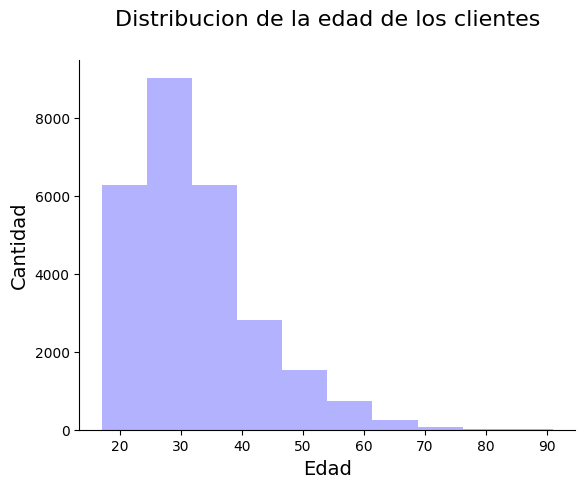

In [ ]:
# Grafico Age
plt.figure()
plt.hist(sd['age'].dropna(), bins=10, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribucion de la edad de los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

Score de crédito

<Figure size 640x480 with 0 Axes>

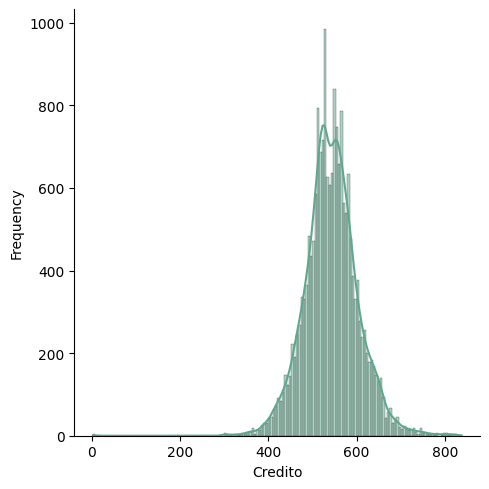

In [ ]:
plt.figure()
sns.displot(sd["credit_score"], color="#5ea88e", kde=True)
plt.xlabel('Credito')
plt.ylabel('Frequency')
sns.despine()
plt.show()

Crédit score según edad

SCATERPLOT

/tmp/ipython-input-2913227247.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="age", y="credit_score",data=sd, palette="spring")


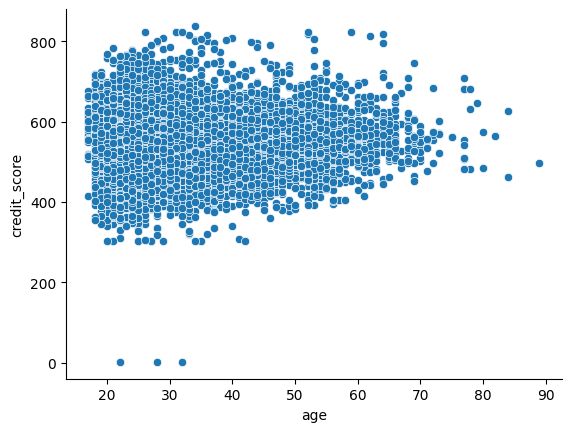

In [ ]:
plt.figure()
sns.scatterplot(x="age", y="credit_score",data=sd, palette="spring")
sns.despine()
plt.show();

Histogramas de otras variables numéricas

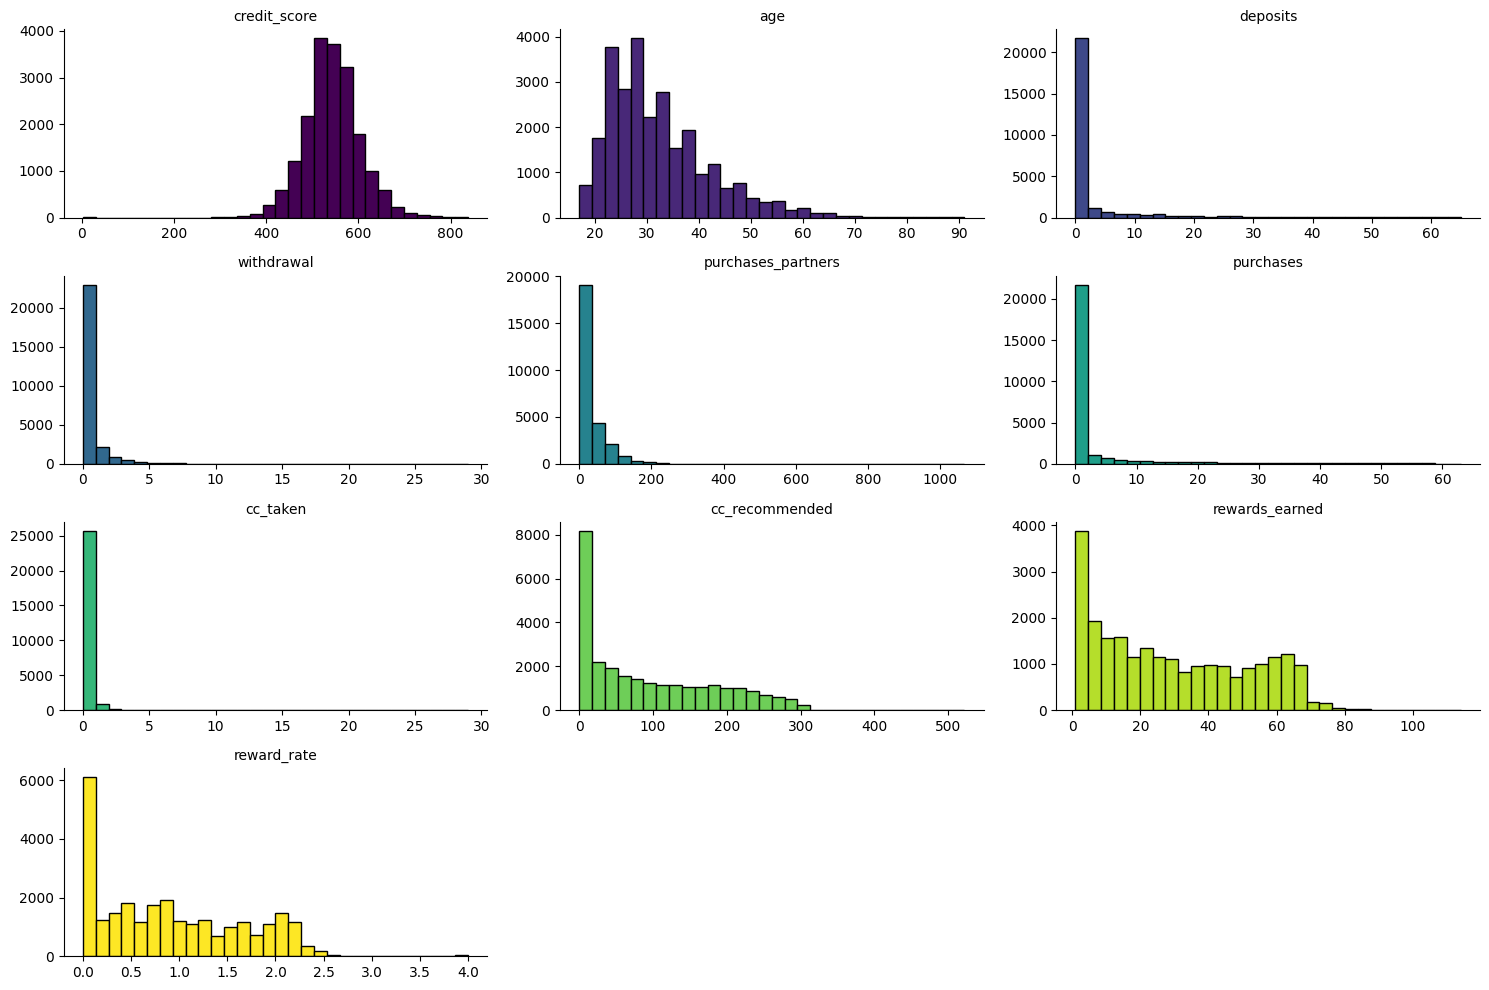

In [ ]:
# Lista de columnas numéricas
cols = [
    "credit_score",
    "age",
    "deposits",
    "withdrawal",
    "purchases_partners",
    "purchases",
    "cc_taken",
    "cc_recommended",
    "rewards_earned",
    "reward_rate"
]

# Definir cantidad de subplots dinámicamente
n_cols = 3  # gráficos por fila
n_rows = -(-len(cols) // n_cols)  # redondeo hacia arriba

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
axes = axes.flatten()

# Definir colores usando un colormap (959 colores distintos disponibles)
colors = plt.cm.viridis(np.linspace(0, 1, len(cols)))

# Dibujar cada histograma
for i, col in enumerate(cols):
    axes[i].hist(sd[col], bins=30, color=colors[i], edgecolor="black")
    axes[i].set_title(col, fontsize=10)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Prestamo otorgado y churn según edad

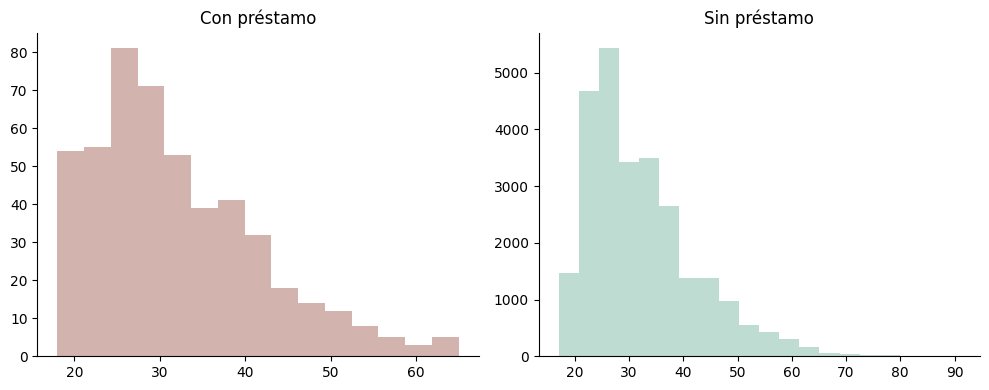

In [ ]:
# Subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Primer gráfico: clientes que recibieron préstamo
ax[0].hist(sd[sd['received_loan'] == 1]["age"], color="#a8685e", alpha=0.5, bins=15)
ax[0].set_title("Con préstamo")
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

# Segundo gráfico: clientes que NO recibieron préstamo
ax[1].hist(sd[sd['received_loan'] == 0]["age"], color="#5ea88e", alpha=0.4, bins=20)
ax[1].set_title("Sin préstamo")
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

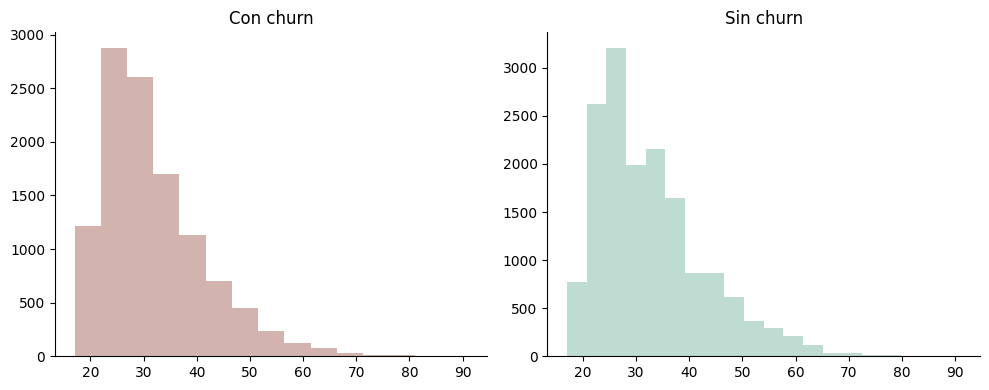

In [ ]:
# Subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Primer gráfico: clientes con churn
ax[0].hist(sd[sd['churn'] == 1]["age"], color="#a8685e", alpha=0.5, bins=15)
ax[0].set_title("Con churn")
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

# Segundo gráfico: clientes sin churn
ax[1].hist(sd[sd['churn'] == 0]["age"], color="#5ea88e", alpha=0.4, bins=20)
ax[1].set_title("Sin churn")
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

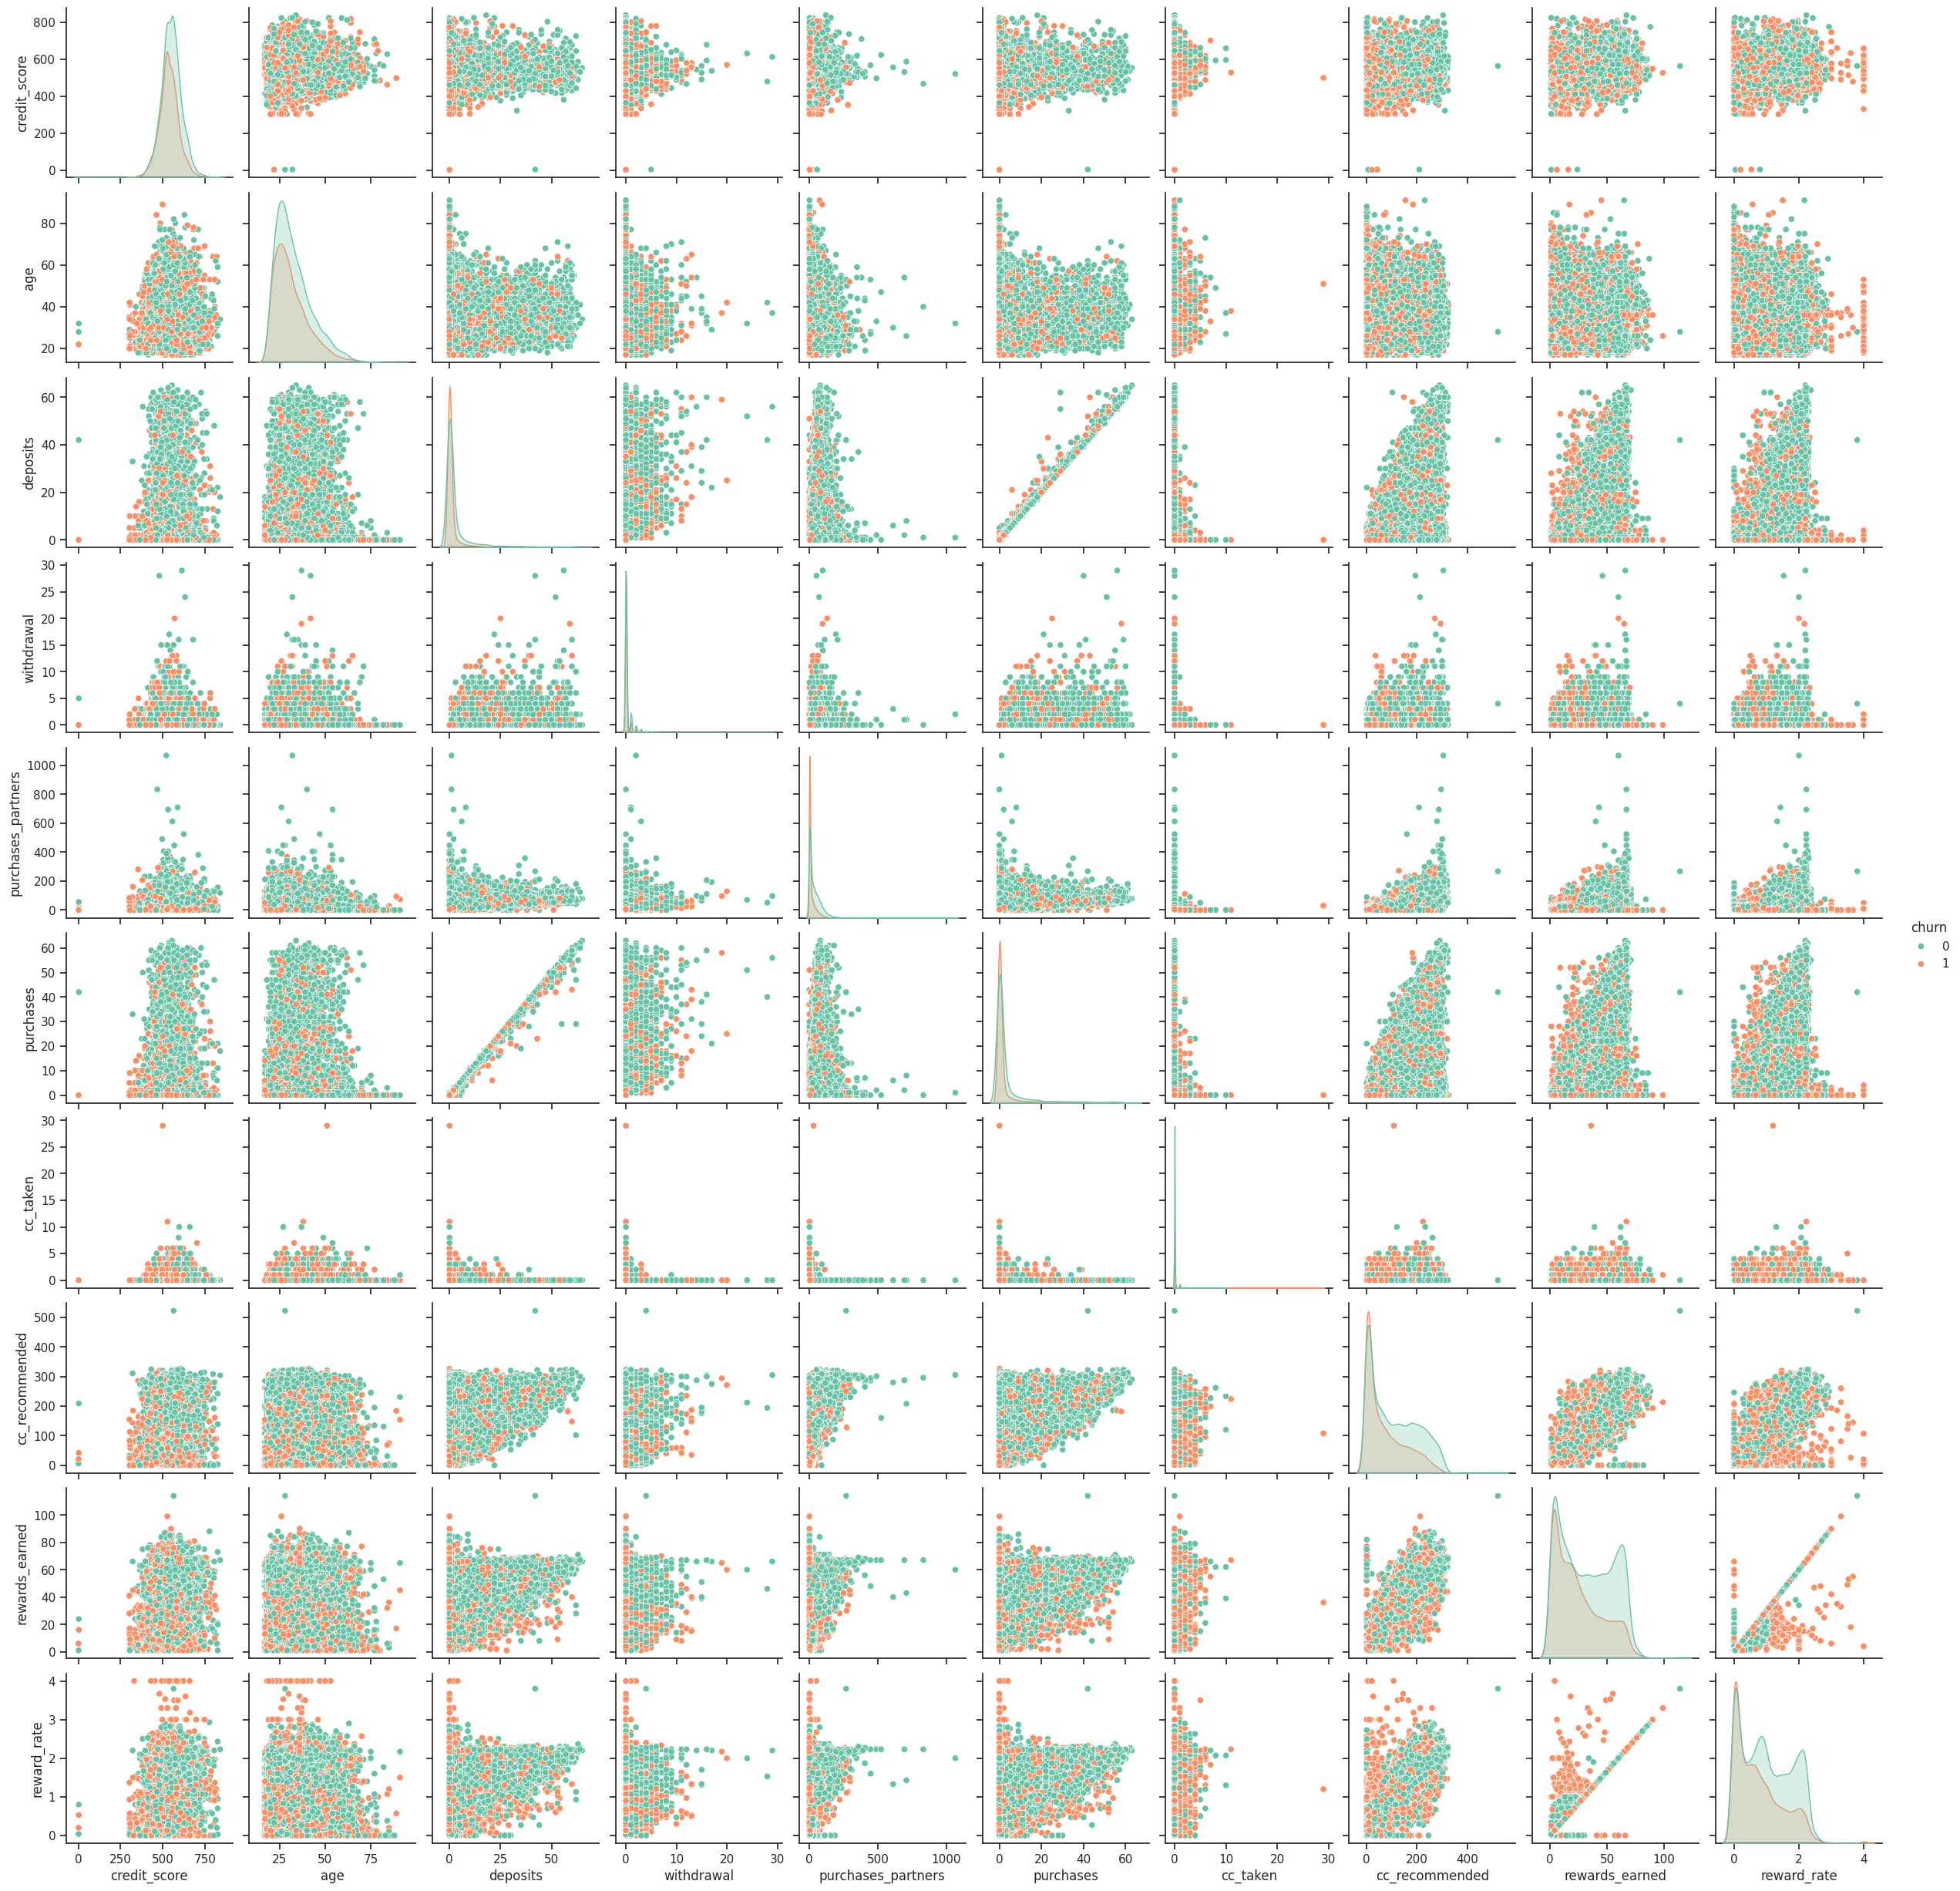

In [ ]:
cols = [
    "credit_score",
    "age",
    "deposits",
    "withdrawal",
    "purchases_partners",
    "purchases",
    "cc_taken",
    "cc_recommended",
    "rewards_earned",
    "reward_rate"
]

# Creamos un dataframe solo con esas columnas + la variable de segmentación
df_pair = sd[cols + ["churn"]]

# Configurar estilo
sns.set_theme(style="ticks")

# Generar pairplot, con color según churn
sns.pairplot(df_pair, hue="churn", diag_kind="kde", palette="Set2")

plt.show()

  partner_engagement     churn
0            Sin uso  0.590932
1               Bajo  0.460023
2              Medio  0.325991
3               Alto  0.192074
4           Muy alto  0.132530


/tmp/ipython-input-4150519969.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_engagement = sd.groupby('partner_engagement')['churn'].mean().reset_index()


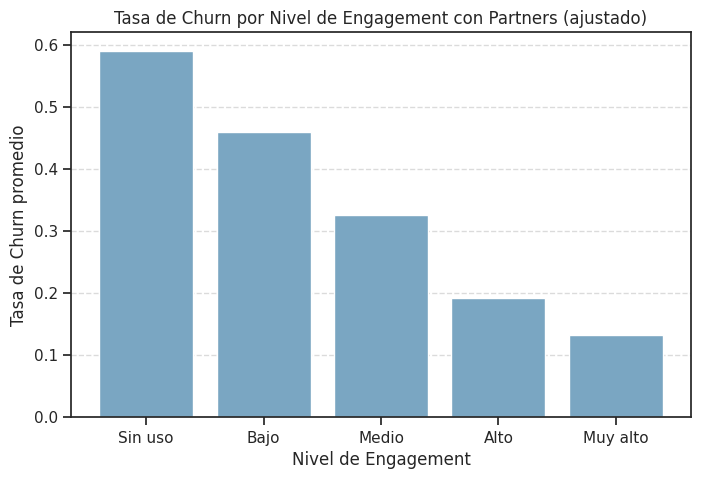

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que los valores sean numéricos
sd['purchases_partners'] = pd.to_numeric(sd['purchases_partners'], errors='coerce')

# Definir bins ajustados
bins = [0, 1, 10, 50, 200, 4800]
labels = ['Sin uso', 'Bajo', 'Medio', 'Alto', 'Muy alto']

# Crear variable categórica
sd['partner_engagement'] = pd.cut(
    sd['purchases_partners'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calcular churn promedio por nivel
churn_by_engagement = sd.groupby('partner_engagement')['churn'].mean().reset_index()

# Ordenar niveles
churn_by_engagement['partner_engagement'] = pd.Categorical(
    churn_by_engagement['partner_engagement'],
    categories=labels,
    ordered=True
)
churn_by_engagement = churn_by_engagement.sort_values('partner_engagement')

# Mostrar tabla y gráfico
print(churn_by_engagement)

plt.figure(figsize=(8, 5))
plt.bar(churn_by_engagement['partner_engagement'], churn_by_engagement['churn'], color="#7aa6c2")
plt.title('Tasa de Churn por Nivel de Engagement con Partners (ajustado)')
plt.xlabel('Nivel de Engagement')
plt.ylabel('Tasa de Churn promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()